# Gradient Decent Implementation on Boston Dataset

In [1]:
import numpy as np
import pandas as pd
import random

## Input x,y,x_test

In [2]:
data=np.genfromtxt('boston_x_y_train.csv',delimiter=',')
data_test=np.genfromtxt('boston_x_test.csv',delimiter=',')
data

array([[-0.40784991, -0.48772236, -1.2660231 , ...,  0.41057102,
        -1.09799011, 37.9       ],
       [-0.40737368, -0.48772236,  0.24705682, ...,  0.29116915,
        -0.52047412, 21.4       ],
       [ 0.1251786 , -0.48772236,  1.01599907, ..., -3.79579542,
         0.89107588, 12.7       ],
       ...,
       [-0.40831101, -0.48772236,  0.24705682, ...,  0.33206621,
        -0.33404299, 20.8       ],
       [-0.41061997, -0.48772236, -1.15221381, ...,  0.203235  ,
        -0.74475218, 22.6       ],
       [ 0.34290895, -0.48772236,  1.01599907, ...,  0.38787479,
        -1.35871335, 50.        ]])

In [3]:
x=data[:,0:13]
y=data[:,13]
x_test=data_test
x.shape

(379, 13)

## process

In [4]:
[d0,d1]=x.shape
[dt0,dt1]=x_test.shape
norm=np.zeros([2,d1])

### Standardize training data

In [5]:
for i in range(d1):
    norm[0,i]=x[:,i].mean()
    norm[1,i]=np.sqrt(x[:,i].var())
    x[:,i]=(x[:,i]-norm[0,i])/norm[1,i]
x

array([[-0.40098068, -0.49042688, -1.28149216, ..., -0.32264241,
         0.42027996, -1.10095452],
       [-0.40053396, -0.49042688,  0.20753471, ...,  0.09391068,
         0.30257958, -0.53143278],
       [ 0.09900799, -0.49042688,  0.96425328, ...,  0.78816582,
        -3.72614514,  0.86057789],
       ...,
       [-0.40141319, -0.49042688,  0.20753471, ...,  0.09391068,
         0.34289385, -0.34758231],
       [-0.40357903, -0.49042688, -1.16949207, ..., -0.7391955 ,
         0.21589851, -0.75260628],
       [ 0.30324229, -0.49042688,  0.96425328, ...,  0.78816582,
         0.39790715, -1.35806871]])

### standardizing test data

In [6]:
for i in range(d1):
    x_test[:,i]=(x_test[:,i]-norm[0,i])/norm[1,i]
x_test

array([[ 2.71887193, -0.49042688,  0.96425328, ...,  0.78816582,
        -1.55922624,  1.00848766],
       [-0.39679863, -0.49042688,  0.36404766, ..., -1.15574859,
         0.45032651, -0.90051604],
       [-0.4059786 , -0.49042688,  0.07830384, ...,  1.15843524,
         0.45032651, -0.5120801 ],
       ...,
       [-0.40301108,  2.08605624, -1.39205635, ..., -0.09122402,
         0.40093342, -0.69040122],
       [-0.39659658, -0.49042688, -0.405594  , ...,  1.11215156,
         0.35078378,  0.1804694 ],
       [-0.14369589, -0.49042688,  1.17676627, ..., -1.75743638,
        -2.88149098,  0.46384794]])

In [7]:
mean=y.mean()
sd=np.sqrt(y.var())
y=(y-mean)/sd
y

array([ 1.63059527e+00, -1.28982221e-01, -1.05675944e+00, -2.88943812e-01,
       -1.16770554e-02,  1.07606176e+00,  6.29716867e-02, -1.18318115e-01,
       -2.24959176e-01,  1.14004639e+00,  5.23075807e-02, -2.78279706e-01,
        2.92095210e+00,  2.54925595e-01, -2.56951494e-01, -6.62187522e-01,
       -2.23411614e-02, -2.35623282e-01, -4.48905402e-01,  1.56661063e+00,
        5.23075807e-02,  1.28934388e+00,  1.11871818e+00,  6.49497517e-01,
       -7.47500370e-01, -4.70233614e-01, -5.76874674e-01,  9.48092485e-01,
        4.25551291e-01,  1.58948641e-01, -3.30052674e-02, -3.31600236e-01,
        1.43864136e+00, -5.34218250e-01,  1.15071050e+00, -1.47265958e+00,
       -1.37668262e+00, -9.82110702e-01,  1.83321328e+00,  1.90940959e-01,
       -5.12890038e-01,  1.80276853e-01,  1.48284535e-01,  5.23075807e-02,
       -1.01410302e+00, -6.30195204e-01,  2.03152626e-02,  5.21528245e-01,
       -8.54141430e-01, -9.82110702e-01, -1.23804925e+00, -3.42264342e-01,
       -8.11485006e-01,  

In [8]:
xdf=pd.DataFrame(x)
xdf[d1]=np.ones(d0)
x=xdf.values
x

array([[-0.40098068, -0.49042688, -1.28149216, ...,  0.42027996,
        -1.10095452,  1.        ],
       [-0.40053396, -0.49042688,  0.20753471, ...,  0.30257958,
        -0.53143278,  1.        ],
       [ 0.09900799, -0.49042688,  0.96425328, ..., -3.72614514,
         0.86057789,  1.        ],
       ...,
       [-0.40141319, -0.49042688,  0.20753471, ...,  0.34289385,
        -0.34758231,  1.        ],
       [-0.40357903, -0.49042688, -1.16949207, ...,  0.21589851,
        -0.75260628,  1.        ],
       [ 0.30324229, -0.49042688,  0.96425328, ...,  0.39790715,
        -1.35806871,  1.        ]])

In [9]:
xtdf=pd.DataFrame(x_test)
xtdf[d1]=np.ones(dt0)
x_test=xtdf.values
x_test

array([[ 2.71887193, -0.49042688,  0.96425328, ..., -1.55922624,
         1.00848766,  1.        ],
       [-0.39679863, -0.49042688,  0.36404766, ...,  0.45032651,
        -0.90051604,  1.        ],
       [-0.4059786 , -0.49042688,  0.07830384, ...,  0.45032651,
        -0.5120801 ,  1.        ],
       ...,
       [-0.40301108,  2.08605624, -1.39205635, ...,  0.40093342,
        -0.69040122,  1.        ],
       [-0.39659658, -0.49042688, -0.405594  , ...,  0.35078378,
         0.1804694 ,  1.        ],
       [-0.14369589, -0.49042688,  1.17676627, ..., -2.88149098,
         0.46384794,  1.        ]])

### Gradient decent code

In [10]:
def grad_point(x,y,m,d1,i):
    grad=np.zeros(d1)
    for k in range(d1):
        grad[k]=2*x[i,k]*((m*x[i,:]).sum()-y[i])
    return grad

In [11]:
def grad_cost(x,y,m,d0,d1):
    grad=np.zeros(d1)
    for i in range(d0):
        grad+=grad_point(x,y,m,d1,i)
    return grad/d0

In [12]:
def grad_batch(x,y,m,d0,d1,batch):
    grad=np.zeros(d1)
    index=random.sample(range(d0),batch)
    for i in index:
        grad+=grad_point(x,y,m,d1,i)
    return grad/batch

In [13]:
def gd(x,y,m,d0,d1,lr,limit):
    mn=m
    i=0
    while i< limit:
        mn-=lr*grad_cost(x,y,mn,d0,d1)
        i+=1
    return mn

In [14]:
def sgd(x,y,m,d0,d1,lr,limit):
    mn=m
    i=0
    while i< limit:
        for j in range(d0):
            mn-=lr*grad_point(x,y,mn,d1,j)
        i+=1
    return mn

In [15]:
def bgd(x,y,m,d0,d1,lr,limit,batch):
    mn=m
    i=0
    while i< limit:
        mn-=lr*grad_batch(x,y,mn,d0,d1,batch)
        i+=1
    return mn

### Deploying gradient decent

In [16]:
[d0,d1]=x.shape
[dt0,dt1]=x_test.shape

In [17]:
m=np.zeros(d1)

In [18]:
lr=.1
mo=gd(x,y,m,d0,d1,lr,50)
print(mo)

[-9.48123663e-02  5.05019163e-02 -4.01309436e-02  9.14176946e-02
 -1.84285943e-01  2.71510593e-01  2.10587904e-03 -2.85655247e-01
  1.62923827e-01 -7.31265973e-02 -2.28224592e-01  6.40765262e-02
 -4.53099284e-01  1.43772417e-16]


### sklearn gradient decent

In [19]:
from sklearn import linear_model as lm
algo=lm.LinearRegression()
algo.fit(x,y)
print(algo.coef_)
print(algo.intercept_)

[-0.10664855  0.07898455  0.00126694  0.08723788 -0.23151139  0.25102769
  0.01294126 -0.32316528  0.27414947 -0.18498221 -0.2398584   0.06364974
 -0.46106581  0.        ]
1.6072122134934954e-16


##  Prediction of gradient decent algorithm

In [20]:
y_test=np.zeros(dt0)
for i in range(dt0):
    y_test[i]=(mo*x_test[i,:]).sum()
y_test=(sd*y_test)+mean
y_test

array([11.86787645, 28.83473232, 22.42330342, 24.27628823, 21.06271411,
        2.83162535, 29.45642353, 24.46936915, 18.83498212, 23.43482616,
       24.36564504, 17.94504806, 18.56740574, 21.90232977, 42.7026309 ,
       24.15841385, 24.49396283, 27.69370334, 20.48612688, 31.41362267,
       24.19587593, 24.69305074, 33.75880368, 35.92796827, 32.25498036,
       16.06260793, 23.08323287, 33.04409724, 24.57701243, 33.46258336,
       17.20140536, 26.28176191, 23.51663932, 25.44354246, 15.02832489,
       29.39355696, 26.13336549, 20.69200689, 24.12469285,  9.54239948,
        7.65210549, 28.68538876, 29.57962084, 20.13142738, 20.3530021 ,
        2.77449118, 39.57795369, 25.77852165, 29.93551754, 16.97950951,
       17.72861945, 39.97042782, 17.75063224, 21.17669026, 15.89021297,
       21.30263278, 18.49519625, 23.12486377, 13.91447761, 17.26460457,
       15.22866833, 29.15487121, 25.24402185, 25.62319394, 16.9740648 ,
       16.9629805 , 34.58190137, 17.08107659, 26.61491133, 22.41

### Prediction of inbuilt sklearn regression algo

In [21]:
y_test_1=algo.predict(x_test)
y_test_1=(y_test_1*sd)+mean
y_test_1

array([12.43328344, 29.03367318, 22.37164455, 24.47778655, 20.60166977,
        2.72533175, 30.40000409, 24.86120042, 18.65724977, 23.53985838,
       24.11396872, 17.71143854, 17.44000298, 21.65356278, 42.31137694,
       23.84974493, 24.47573232, 27.53872655, 20.23606694, 31.15155453,
       23.78237904, 25.00979443, 33.95768541, 36.43515649, 32.04098329,
       16.71322632, 23.47176611, 32.93828009, 25.1807008 , 33.71008685,
       16.88580202, 26.02760837, 23.27040025, 25.47758968, 15.00946631,
       29.5857494 , 26.24821245, 20.37245654, 24.43681498,  9.44706894,
        8.38096654, 29.01392345, 29.59085403, 19.7575697 , 20.3719679 ,
        3.14442625, 39.52420118, 25.71741222, 30.37729628, 16.79453264,
       17.89088652, 41.02574533, 17.57238787, 20.89662584, 15.59837696,
       21.41394912, 18.4543645 , 23.1557639 , 13.67245022, 17.23573882,
       15.02710365, 29.15131353, 25.17166386, 25.49749375, 17.21186687,
       17.42936995, 34.70372763, 17.01340803, 27.10724289, 22.54

### comparison

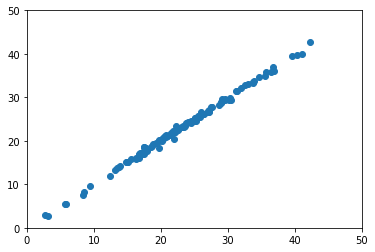

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test_1,y_test)
plt.axis([0,50,0,50])
plt.show()

In [24]:
np.savetxt('boston_y_predict.csv',y_test,delimiter=',')